In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import pickle
import matplotlib.pyplot as plt

In [10]:
dataframe = pd.read_csv('../features/train_final.csv')
seed = 28
X = dataframe.drop(columns='Item_Outlet_Sales') # Drop feature to predict
x_train, x_val, y_train, y_val = train_test_split(X,
                                                  dataframe['Item_Outlet_Sales'],
                                                  test_size = 0.3,
                                                  random_state=seed)

In [11]:
dataframe.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,4,21,1,2,3735.1380,False,True,False,False
1,5.92,0.019278,1,11,1,0,443.4228,False,False,True,False
2,17.50,0.016760,2,21,1,2,2097.2700,False,True,False,False
3,19.20,0.000000,3,22,0,0,732.3800,True,False,False,False
4,8.93,0.000000,1,33,2,0,994.7052,False,True,False,False


Métricas del Modelo:
ENTRENAMIENTO: RMSE: 1169.35 - R2: 0.5284
VALIDACIÓN: RMSE: 1146.66 - R2: 0.5526

Coeficientes del Modelo:
Intersección: 253.70
                        features  Coeficiente Estimados
0                    Item_Weight              -2.332949
1                Item_Visibility            -311.774516
2                       Item_MRP             825.276595
3      Outlet_Establishment_Year             -10.632046
4                    Outlet_Size             102.518103
5           Outlet_Location_Type              27.760861
6      Outlet_Type_Grocery Store           -1664.691331
7  Outlet_Type_Supermarket Type1             191.570173
8  Outlet_Type_Supermarket Type2            -242.596116
9  Outlet_Type_Supermarket Type3            1715.717274 



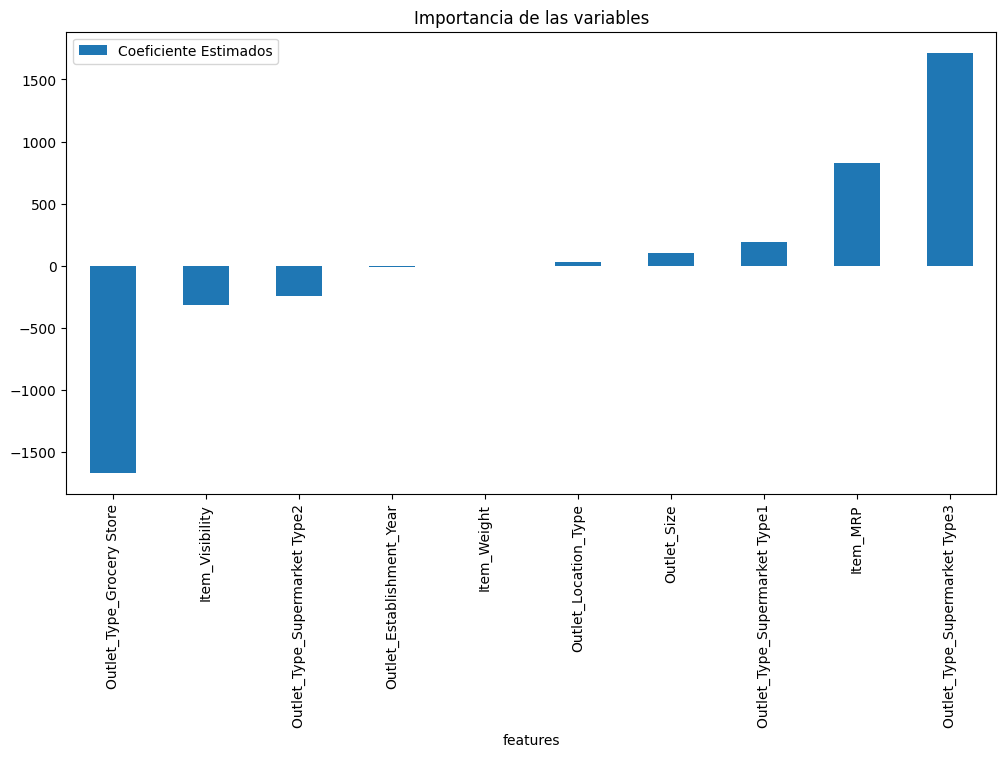

In [12]:
model_pkl_file = '../model_trained/model.pkl'
# load model from pickle file
with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)

# Predicción del modelo ajustado para el conjunto de validación
pred = model.predict(x_val)

# Cálculo de los errores cuadráticos medios y Coeficiente de Determinación (R^2)
mse_train = metrics.mean_squared_error(y_train, model.predict(x_train))
R2_train = model.score(x_train, y_train)
print('Métricas del Modelo:')
print('ENTRENAMIENTO: RMSE: {:.2f} - R2: {:.4f}'.format(mse_train**0.5, R2_train))

mse_val = metrics.mean_squared_error(y_val, pred)
R2_val = model.score(x_val, y_val)
print('VALIDACIÓN: RMSE: {:.2f} - R2: {:.4f}'.format(mse_val**0.5, R2_val))

print('\nCoeficientes del Modelo:')
# Constante del modelo
print('Intersección: {:.2f}'.format(model.intercept_))

# Coeficientes del modelo
coef = pd.DataFrame(x_train.columns, columns=['features'])
coef['Coeficiente Estimados'] = model.coef_
print(coef, '\n')
coef.sort_values(by='Coeficiente Estimados').set_index('features').plot(kind='bar', title='Importancia de las variables', figsize=(12, 6))

plt.show()